In [30]:
red = arch_all
red['just_date'] = red['session_ts'].dt.date
red['just_date'] = pd.to_datetime(red['just_date'])
red2 = red.groupby(['just_date','animal_id']).sum()

In [31]:
red3 = red2.reset_index(level='animal_id').groupby('animal_id').resample('1D').mean() #Complete missing dates with NaN
#red3 = red3.drop('animal_id',1)
red3 = red3.groupby(level='animal_id').fillna(method='bfill') #fills the NaN with the first next non NaN value
red3 = red3.apply(pd.to_numeric, downcast='integer') #just to have ints, easier to read

In [32]:
len(red3)

405

In [33]:
res = red3.reset_index(level='animal_id').groupby('animal_id').resample('1D').first() #group by 2 days periods and keep only the first value
#res = res.drop('subjectID',1)


In [34]:
len(res)

405

In [35]:
res = res.groupby(level=['animal_id', 'just_date']).first() #regroups periods with no data for more than 4 days

In [36]:
len(res)

405

In [37]:
red = red.set_index(['animal_id', 'just_date']) 
red = red[red.index.isin(res.index)]

red = red.reset_index(drop=True)
#red.unstack()

#red.drop(['just_date'],axis = 1)
#red.drop(red.get_group(group_name).index)

In [38]:

label = 'reduced \nn={}'.format(len(red))#and labels them
gridc = red[red.grid_score_bnt > grid_cutoff]
hdc = red[(red.tc_stats_mvl_bnt > mvl_cutoff)&(red.angular_stability_bnt>0.6)]#note additional criteria for stability
speedc = red[red.speedscore_bnt > speed_cutoff]
borderc = red[red.borderscore_bnt > border_cutoff]

unclas = red[(~red.index.isin(gridc.index)) &\
               (~red.index.isin(hdc.index))  &\
               (~red.index.isin(speedc.index))  &\
               (~red.index.isin(borderc.index))]

In [39]:
pure_gridc = gridc[(~gridc.index.isin(hdc.index)) & (~gridc.index.isin(speedc.index)) & (~gridc.index.isin(borderc.index))]
pure_hdc = hdc[(~hdc.index.isin(gridc.index)) & (~hdc.index.isin(speedc.index)) & (~hdc.index.isin(borderc.index))]
pure_borderc = borderc[(~borderc.index.isin(gridc.index)) & (~borderc.index.isin(speedc.index)) & (~borderc.index.isin(hdc.index))]
pure_speedc = speedc[(~speedc.index.isin(gridc.index)) & (~speedc.index.isin(borderc.index)) & (~speedc.index.isin(hdc.index))]

In [40]:
all_len = len(red)
# Grid
grid_len = len(gridc)
frac_grid = grid_len/all_len
pure_grid_len = len(pure_gridc)
mix_grid_len = grid_len-pure_grid_len

# HD
hd_len = len(hdc)
frac_hd = hd_len/all_len
pure_hd_len = len(pure_hdc)
mix_hd_len = hd_len-pure_hd_len

# Speed
speed_len = len(speedc)
frac_speed = speed_len/all_len
pure_speed_len = len(pure_speedc)
mix_speed_len = speed_len-pure_speed_len

# Border
border_len = len(borderc)
frac_border = border_len/all_len
pure_border_len = len(pure_borderc)
mix_border_len = border_len-pure_border_len

# Rest
#unstable_HD = cells[(cells.tc_stats_mvl_bnt > mvl_cutoff)&(cells.angular_stability_bnt <= 0.6)]#must also add unstable head direction cells
unclas_len = len(unclas)
frac_unclas = unclas_len/all_len


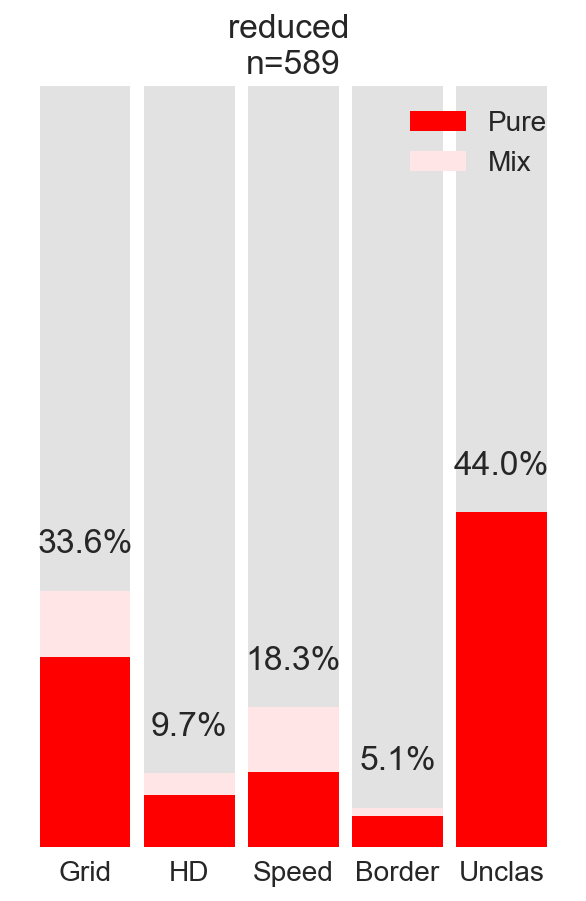

(0.2495755517826825, 0.06791171477079797, 0.09847198641765705, 0.04074702886247878, 0.4397283531409168)


In [41]:
# grid, hd, speed, border, unclassified
sns.set(font_scale=1.4,style='white')
seq_col_brew = sns.color_palette(sns.light_palette("red",5))
sns.set_palette(seq_col_brew)

plt.figure(figsize=(5,7))


N = 5
pure = (pure_grid_len/all_len, pure_hd_len/all_len, pure_speed_len/all_len, pure_border_len/all_len, unclas_len/all_len)
mix = (mix_grid_len/all_len, mix_hd_len/all_len, mix_speed_len/all_len, mix_border_len/all_len,0)

rest = ((all_len-(pure_grid_len+mix_grid_len))/all_len,\
        (all_len-(pure_hd_len+mix_hd_len))/all_len,\
        (all_len-(pure_speed_len+mix_speed_len))/all_len,\
        (all_len-(pure_border_len+mix_border_len))/all_len,\
        (all_len-unclas_len)/all_len)

ind = np.arange(N)    # the x locations for the groups
width = 0.87       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, pure, width, color=seq_col_brew[4])
p2 = plt.bar(ind, mix, width, color=seq_col_brew[0], bottom=pure)
p3 = plt.bar(ind, rest,width,color=plt.cm.Greys(0.2),bottom=[x+y for x,y in zip(pure,mix)])

labels = [frac_grid,frac_hd,frac_speed,frac_border,frac_unclas]
for i in ind:
    # write label:
    plt.text(i,labels[i]+.05,'{:.1f}%'.format(labels[i]*100),horizontalalignment='center')

#plt.ylabel('Fraction')
plt.xticks(ind, ('Grid', 'HD', 'Speed', 'Border','Unclas'))
plt.gca().get_yaxis().set_ticks([])

plt.legend((p1[0], p2[0]), ('Pure', 'Mix'))
plt.ylim(0,1)
plt.title(label)
sns.despine(left=True,bottom=True)
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig(r'N:\davidcr\stellate paper images\python output\1d_stacked_bar.svg', format='svg', dpi=1000)
plt.show()
print(pure)

In [42]:
gridc.index

Int64Index([  1,   2,   4,   6,   8,  16,  19,  26,  33,  35,
            ...
            560, 561, 563, 568, 569, 572, 579, 580, 582, 586],
           dtype='int64', length=198)

In [43]:
red.head(10)

,n_drive_user,filename,session_ts,session_name,session_name_laser,tetrode_no,cluster_no,inhibited_,label,mean_freq,...,change_point_ms,spiketimes_cluster,stimulus_timepoints,sum_1ms,bin_edges_1ms,binnumber_1ms,theta_mean_phase_bnt_single,theta_strength_bnt_single,calbindin_dist_bnt_single,null
0,davidcr,N:/davidcr/70114/25012017/KLUSTA/3.kwik,2017-01-25 16:21:05,25012017s1,25012017laserSess2,8,34,inhibited,inhibited,5.58642,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.813793,0.188183,0.798689,
1,davidcr,N:/davidcr/T4743/10112016/KLUSTA/3.kwik,2016-11-10 16:30:47,10112016s1,10112016laserSess2,8,20,inhibited,inhibited,0.246957,...,NaN,NaN,NaN,NaN,NaN,NaN,2.205426,0.296656,0.119427,
2,davidcr,N:/davidcr/T4743/12112016/KLUSTA/2.kwik,2016-11-12 13:15:54,12112016s1,12112016laserSess2,7,36,inhibited,inhibited,1.75228,...,NaN,NaN,NaN,NaN,NaN,NaN,2.426135,0.172916,0.263834,
3,davidcr,N:/davidcr/70110/14112016/KLUSTA/0.kwik,2016-11-14 10:34:10,14112016s1,14112016laserSess2,5,28,inhibited,inhibited,0.503872,...,NaN,NaN,NaN,NaN,NaN,NaN,-2.580840,0.126903,-0.098834,
4,davidcr,N:/davidcr/T4743/31102016/KLUSTA/0.kwik,2016-10-31 13:00:11,31102016s1,31102016laserSess1,5,20,inhibited,inhibited,2.90837,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.453422,0.361983,0.997329,
5,davidcr,N:/davidcr/70110/14112016/KLUSTA/1.kwik,2016-11-14 10:34:10,14112016s1,14112016laserSess2,6,23,inhibited,inhibited,0.800885,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.830326,0.055801,0.731971,
6,davidcr,N:/davidcr/T4743/10112016/KLUSTA/3.kwik,2016-11-10 16:30:47,10112016s1,10112016laserSess2,8,18,inhibited,inhibited,0.588742,...,NaN,NaN,NaN,NaN,NaN,NaN,2.546568,0.470822,-0.697579,
7,davidcr,N:/davidcr/T4743/12112016/KLUSTA/3.kwik,2016-11-12 13:15:54,12112016s1,12112016laserSess2,8,10,inhibited,inhibited,0.845285,...,NaN,NaN,NaN,NaN,NaN,NaN,1.799180,0.065198,0.752272,
8,davidcr,N:/davidcr/70110/18112016/KLUSTA/0.kwik,2016-11-18 18:07:49,18112016s1,18112016laserSess2,5,35,inhibited,inhibited,0.751675,...,NaN,NaN,NaN,NaN,NaN,NaN,0.045869,0.012233,0.743918,
9,davidcr,N:/davidcr/70110/22112016/KLUSTA/1.kwik,2016-11-22 13:37:04,22112016s1,22112016laserSess2,6,25,inhibited,inhibited,0.566468,...,NaN,NaN,NaN,NaN,NaN,NaN,2.246019,0.083210,0.588212,


In [44]:
red.head(10)

,n_drive_user,filename,session_ts,session_name,session_name_laser,tetrode_no,cluster_no,inhibited_,label,mean_freq,...,change_point_ms,spiketimes_cluster,stimulus_timepoints,sum_1ms,bin_edges_1ms,binnumber_1ms,theta_mean_phase_bnt_single,theta_strength_bnt_single,calbindin_dist_bnt_single,null
0,davidcr,N:/davidcr/70114/25012017/KLUSTA/3.kwik,2017-01-25 16:21:05,25012017s1,25012017laserSess2,8,34,inhibited,inhibited,5.58642,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.813793,0.188183,0.798689,
1,davidcr,N:/davidcr/T4743/10112016/KLUSTA/3.kwik,2016-11-10 16:30:47,10112016s1,10112016laserSess2,8,20,inhibited,inhibited,0.246957,...,NaN,NaN,NaN,NaN,NaN,NaN,2.205426,0.296656,0.119427,
2,davidcr,N:/davidcr/T4743/12112016/KLUSTA/2.kwik,2016-11-12 13:15:54,12112016s1,12112016laserSess2,7,36,inhibited,inhibited,1.75228,...,NaN,NaN,NaN,NaN,NaN,NaN,2.426135,0.172916,0.263834,
3,davidcr,N:/davidcr/70110/14112016/KLUSTA/0.kwik,2016-11-14 10:34:10,14112016s1,14112016laserSess2,5,28,inhibited,inhibited,0.503872,...,NaN,NaN,NaN,NaN,NaN,NaN,-2.580840,0.126903,-0.098834,
4,davidcr,N:/davidcr/T4743/31102016/KLUSTA/0.kwik,2016-10-31 13:00:11,31102016s1,31102016laserSess1,5,20,inhibited,inhibited,2.90837,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.453422,0.361983,0.997329,
5,davidcr,N:/davidcr/70110/14112016/KLUSTA/1.kwik,2016-11-14 10:34:10,14112016s1,14112016laserSess2,6,23,inhibited,inhibited,0.800885,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.830326,0.055801,0.731971,
6,davidcr,N:/davidcr/T4743/10112016/KLUSTA/3.kwik,2016-11-10 16:30:47,10112016s1,10112016laserSess2,8,18,inhibited,inhibited,0.588742,...,NaN,NaN,NaN,NaN,NaN,NaN,2.546568,0.470822,-0.697579,
7,davidcr,N:/davidcr/T4743/12112016/KLUSTA/3.kwik,2016-11-12 13:15:54,12112016s1,12112016laserSess2,8,10,inhibited,inhibited,0.845285,...,NaN,NaN,NaN,NaN,NaN,NaN,1.799180,0.065198,0.752272,
8,davidcr,N:/davidcr/70110/18112016/KLUSTA/0.kwik,2016-11-18 18:07:49,18112016s1,18112016laserSess2,5,35,inhibited,inhibited,0.751675,...,NaN,NaN,NaN,NaN,NaN,NaN,0.045869,0.012233,0.743918,
9,davidcr,N:/davidcr/70110/22112016/KLUSTA/1.kwik,2016-11-22 13:37:04,22112016s1,22112016laserSess2,6,25,inhibited,inhibited,0.566468,...,NaN,NaN,NaN,NaN,NaN,NaN,2.246019,0.083210,0.588212,
